In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
import copy
import importlib

import neural_style_transfer
importlib.reload(neural_style_transfer)  

from neural_style_transfer import (
    ContentLoss, StyleLoss, Normalization, gram_matrix,
    get_style_model_and_losses, get_input_optimizer, run_style_transfer,
    img_loader, device, cnn, cnn_normalization_mean, cnn_normalization_std
)

128


In [ ]:
img_dir = "images/"
content_img = img_loader(img_dir + "tajmahal.jpg")
style_img = img_loader(img_dir + "starrynight.jpg")

print(f"Content image shape: {content_img.shape}")
print(f"Style image shape: {style_img.shape}")

assert content_img.size() == style_img.size(), "Content and style images must have the same size"

Content image shape: torch.Size([1, 3, 128, 128])
Style image shape: torch.Size([1, 3, 128, 128])


In [9]:
# Helper function to display tensor as image
def imshow(tensor, title=None):
    unloader = transforms.ToPILImage()
    image = tensor.cpu().clone()
    image = image.squeeze(0)  # remove batch dimension
    image = unloader(image)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.axis('off')
    plt.show()

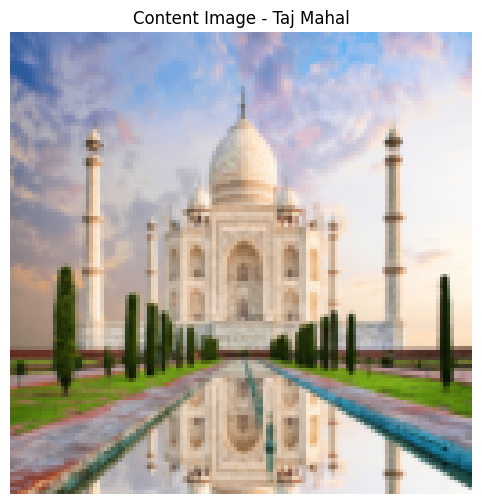

In [ ]:
imshow(content_img, title='Content Image')

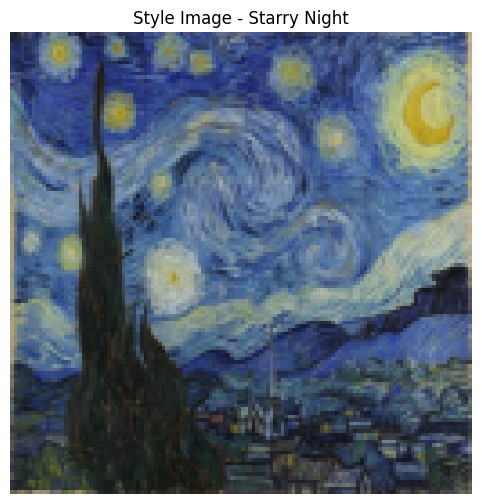

In [ ]:
imshow(style_img, title='Style Image')

Input image initialized


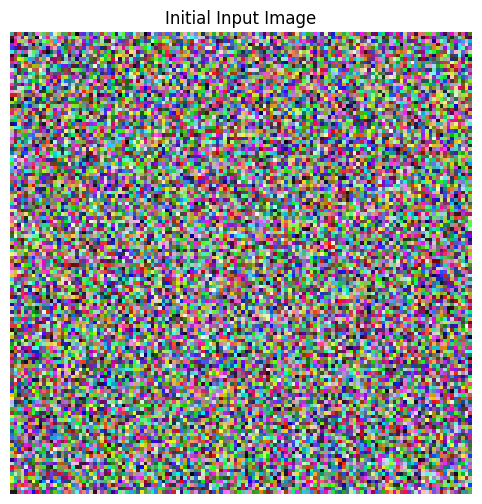

In [12]:
# Initialize input image (start with content image or white noise)
# Option 1: Start with content image
# input_img = content_img.clone()

# Option 2: Start with white noise (often gives more artistic results)
input_img = torch.randn(content_img.data.size(), device=device)

print("Input image initialized")
imshow(input_img, title='Initial Input Image')

In [ ]:
# Run style transfer with custom parameters
output = run_style_transfer(
    cnn, cnn_normalization_mean, cnn_normalization_std,
    content_img, style_img, input_img, 
    num_steps=300,  # Reduce for faster testing, increase for better quality
    style_weight=1000000, 
    content_weight=1
)

Starting neural style transfer...
This may take several minutes depending on your hardware and number of steps.


c:\Users\iltar\Dev\neural-style-transfer\neural_style_transfer.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
c:\Users\iltar\Dev\neural-style-transfer\neural_style_transfer.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)
c:\Users\iltar\Dev\neural-style-transfer\.venv\Lib\site-packages\torch\optim\lbfgs.py:457: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:836.)
  loss

run [50]:
Style Loss : 15.873369 Content Loss: 35.791122

run [100]:
Style Loss : 6.419985 Content Loss: 22.897406

run [100]:
Style Loss : 6.419985 Content Loss: 22.897406

run [150]:
Style Loss : 4.549239 Content Loss: 16.972780

run [150]:
Style Loss : 4.549239 Content Loss: 16.972780

run [200]:
Style Loss : 3.745777 Content Loss: 14.115345

run [200]:
Style Loss : 3.745777 Content Loss: 14.115345

run [250]:
Style Loss : 3.248461 Content Loss: 12.545978

run [250]:
Style Loss : 3.248461 Content Loss: 12.545978

run [300]:
Style Loss : 2.935340 Content Loss: 11.680957

run [300]:
Style Loss : 2.935340 Content Loss: 11.680957

Style transfer completed!
Style transfer completed!


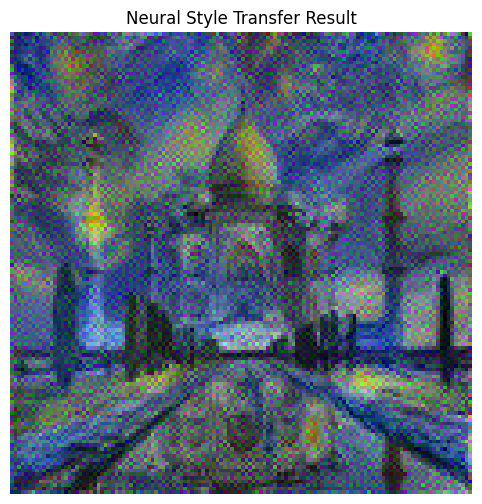

Result saved as 'images/stylized_pytorch.jpg'


In [ ]:
imshow(output, title='Neural Style Transfer Result')

# Save the result
unloader = transforms.ToPILImage()
result_image = output.cpu().clone()
result_image = result_image.squeeze(0)
result_image = unloader(result_image)
result_image.save('images/stylized_pytorch.jpg')
print("Result saved as 'images/stylized_pytorch.jpg'")

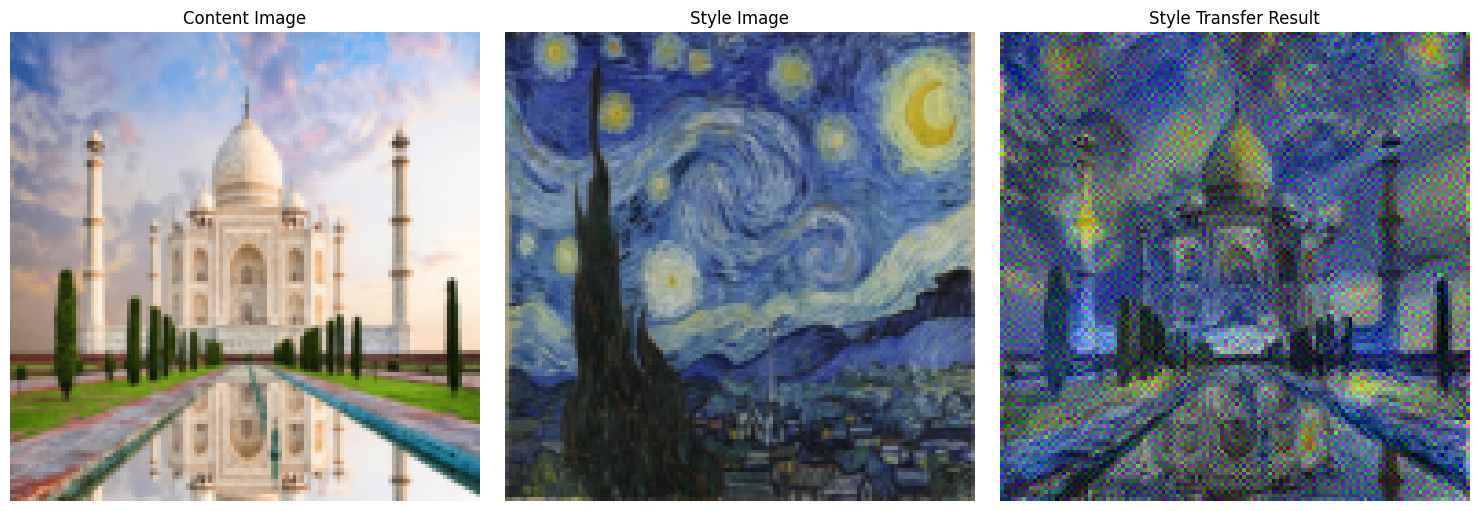

In [15]:
# Create side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

unloader = transforms.ToPILImage()

# Content image
content_display = content_img.cpu().clone().squeeze(0)
content_display = unloader(content_display)
axes[0].imshow(content_display)
axes[0].set_title('Content Image')
axes[0].axis('off')

# Style image
style_display = style_img.cpu().clone().squeeze(0)
style_display = unloader(style_display)
axes[1].imshow(style_display)
axes[1].set_title('Style Image')
axes[1].axis('off')

# Result image
result_display = output.cpu().clone().squeeze(0)
result_display = unloader(result_display)
axes[2].imshow(result_display)
axes[2].set_title('Style Transfer Result')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Experiment with different style/content weights
# Higher style_weight = more stylized, less content preservation
# Higher content_weight = more content preservation, less stylization

# Example: More style emphasis
# input_img_experiment = torch.randn(content_img.data.size(), device=device)
# result_stylized = run_style_transfer(
#     cnn, cnn_normalization_mean, cnn_normalization_std,
#     content_img, style_img, input_img_experiment,
#     num_steps=200,
#     style_weight=5000000,  # Much higher style weight
#     content_weight=1
# )
# imshow(result_stylized, title='High Style Weight Result')


print("Parameters to try:")
print("- style_weight: 100000, 1000000, 5000000")
print("- content_weight: 0.1, 1, 10") 
print("- num_steps: 100, 300, 1000")